In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import peakutils as pk

In [93]:
wd = os.getcwd()
rootdatadir = os.path.join(wd, "data")

# SPE Data Loading

In [94]:
def spelength(filename, filedir):
    with open(os.path.join(filedir, filename)) as f:
        data = f.read()
    data = data.split("\n")
    datalen = data[11].split()
    datalen = int(datalen[1])
    return datalen

In [95]:
def spedata(filename, filedir):
    firstdataline = 13
    with open(os.path.join(filedir, filename)) as f:
        data = f.read()
    data = data.split("\n")
    data = data[firstdataline:firstdataline + spelength(filename, filedir)]
    data = [int(i) for i in data]
    return data

# $^3$He neutron detector

In [96]:
qvalue = 762. #keV

In [97]:
datadir = os.path.join(rootdatadir, "neutron detectors")
print(datadir)

C:\Users\jrpl\Documents\GitHub\nucnotes\ne550\Lab 10\data\neutron detectors


In [98]:
filelist = [f for f in os.listdir(datadir) if "He3" in f]
print(filelist)

['He3 60s 0.5microseconds.Spe', 'He3 60s 10microseconds.Spe', 'He3 60s 1microseconds.Spe', 'He3 60s 2microseconds.Spe', 'He3 60s 3microseconds.Spe', 'He3 60s 6microseconds.Spe']


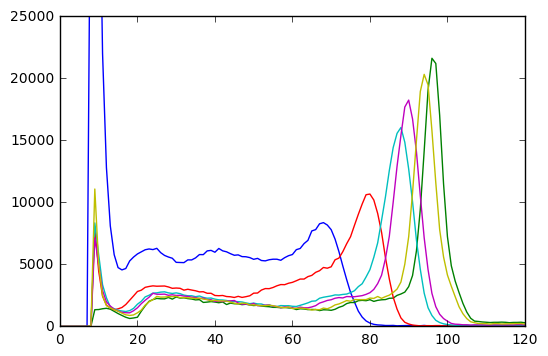

In [99]:
for f in filelist:
    plt.plot(spedata(f, datadir))
plt.ylim(0, 25000)
plt.xlim(0,120)
plt.show()

In [100]:
for f in filelist:
    ix = pk.indexes(
        np.array(spedata(f, datadir))[60:120], 
        thres=0.5, 
        min_dist=20)
    print("{}: {}, {}".format(f, ix[0]+60, spedata(f, datadir)[ix[0]+60]))

He3 60s 0.5microseconds.Spe: 68, 8372
He3 60s 10microseconds.Spe: 96, 21627
He3 60s 1microseconds.Spe: 80, 10677
He3 60s 2microseconds.Spe: 88, 16044
He3 60s 3microseconds.Spe: 90, 18253
He3 60s 6microseconds.Spe: 94, 20329


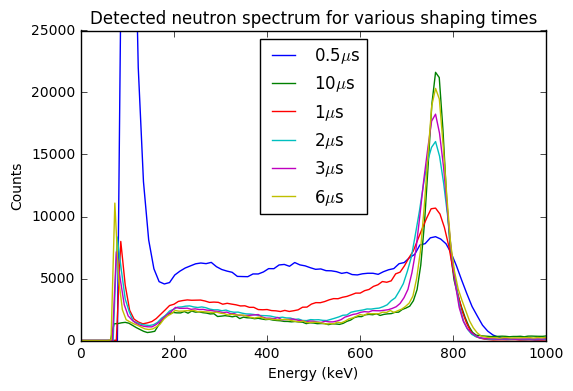

In [101]:
for f in filelist:
    x = np.linspace(0, spelength(f, datadir), spelength(f, datadir))
    ix = pk.indexes(
        np.array(spedata(f, datadir))[60:120], 
        thres=0.5, 
        min_dist=20)
    xfrm = qvalue / (60 + ix[0])

    x = xfrm * x
    plt.plot(x, spedata(f, datadir), label=r'{}$\mu$s'.format(f[8:-16]))
plt.ylim(0, 25000)
plt.xlim(0, 1000)
plt.legend(loc="upper center")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Detected neutron spectrum for various shaping times")
plt.show()

# BF$_3$ neutron detector

In [102]:
qvalue = 2790.

In [103]:
datadir = os.path.join(rootdatadir, "neutron detectors")

In [104]:
filelist = [f for f in os.listdir(datadir) if "BF" in f]
print(filelist)

['BF3 120s 0.5microseconds.Spe', 'BF3 120s 10microseconds.Spe', 'BF3 120s 1microseconds.Spe', 'BF3 120s 2microseconds.Spe', 'BF3 120s 3microseconds.Spe', 'BF3 120s 6microseconds.Spe']


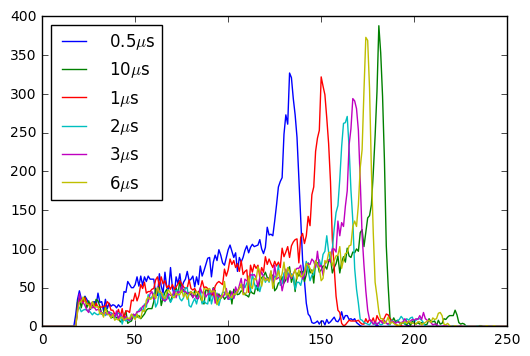

In [105]:
for f in filelist:
    plt.plot(spedata(f, datadir), label=r'{}$\mu$s'.format(f[8:-16]))
plt.xlim(0, 250)
plt.legend(loc="upper left")
plt.show()

In [106]:
for f in filelist:
    ix = pk.indexes(
        np.array(spedata(f, datadir)), 
        thres=0.5, 
        min_dist=20)
    print("{}: {}, {}".format(f, ix[0], spedata(f, datadir)[ix[0]]))

BF3 120s 0.5microseconds.Spe: 133, 327
BF3 120s 10microseconds.Spe: 181, 388
BF3 120s 1microseconds.Spe: 150, 322
BF3 120s 2microseconds.Spe: 164, 271
BF3 120s 3microseconds.Spe: 167, 294
BF3 120s 6microseconds.Spe: 174, 373


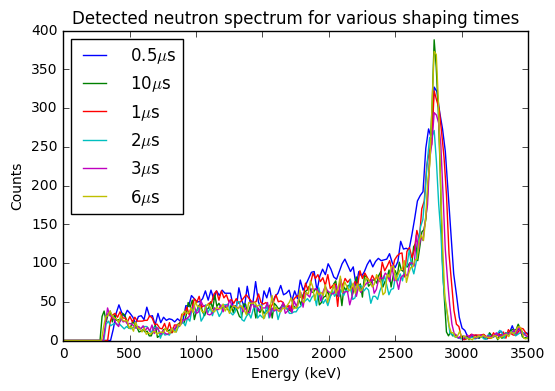

In [108]:
for f in filelist:
    x = np.linspace(0, spelength(f, datadir), spelength(f, datadir))
    ix = pk.indexes(
        np.array(spedata(f, datadir)), 
        thres=0.5, 
        min_dist=20)
    xfrm = qvalue / (ix[0])
    
    x = xfrm * x
    plt.plot(x, spedata(f, datadir), label=r'{}$\mu$s'.format(f[8:-16]))
plt.xlim(0, 3500)
plt.legend(loc="upper left")
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Detected neutron spectrum for various shaping times")
plt.show()

# Boron loaded organic scintillator

In [109]:
datadir = os.path.join(rootdatadir, "boron loaded organic scintillator")
print(datadir)

C:\Users\jrpl\Documents\GitHub\nucnotes\ne550\Lab 10\data\boron loaded organic scintillator


In [111]:
filelist = os.listdir(datadir)
print(filelist)

['with Na.Spe', 'without Na.Spe']


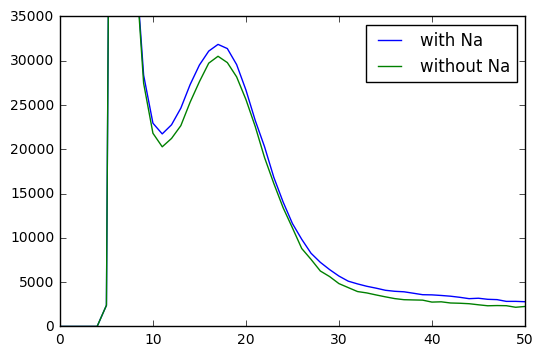

In [118]:
for f in filelist:
    plt.plot(spedata(f, datadir), label=f[:-4])
plt.xlim(0,50)
plt.ylim(0,35000)
plt.legend(loc='upper right')
plt.show()